# Atividade 2 - Processamento de Imagens

Alunos:

    Natalia Ferraz Ribeiro - RA: 13.02818-9
    
    Renan Souza Silva - RA: 13.00563-4

In [38]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install Pillow

In [9]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Exercício 1

Aplicando a Transformada de Fourier unidimensional em cada linha e em cada coluna.

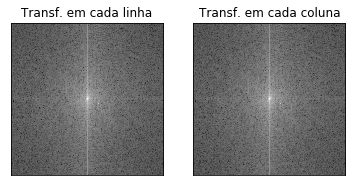

In [6]:
c = 20
img = cv2.imread('sunset3.bmp',0)

#Transformada de Fourier unidimensional (Lê por linha)
f = np.fft.fft(img)
#Traspõe para ler em colunas
f = np.transpose(f) 
#Aplica a Transformada de Fourier unidimensional 
f = np.fft.fft(f)
#Volta ao estado original
f = np.transpose(f)

#Transformada de Fourier bidimensional
f2 = np.fft.fft2(img)

#Shift
fshift = np.fft.fftshift(f2)
fshift2 = np.fft.fftshift(f2)

#Magnitude
magnitude_spectrum = (c * np.log(np.abs(fshift)))
magnitude_spectrum2 = (c * np.log(np.abs(fshift2)))

plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Transf. em cada linha'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Transf. em cada coluna'), plt.xticks([]), plt.yticks([])

plt.show()

Aplicando a Transformada Inversa de Fourier bidimensional e comparação com a original.

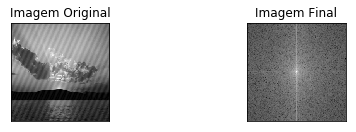

In [4]:
img = cv2.imread('sunset3.bmp',0)

# fft para converter a imagem para o domínio freq
f = np.fft.fft2(img)

# shift
fshift = np.fft.fftshift(f)

# magnitude
magnitude_spectrum = 20*np.log(np.abs(fshift))

# shift back
f_ishift = np.fft.ifftshift(fshift)

# fft inversa para obter a imagem de volta
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Imagem Final'), plt.xticks([]), plt.yticks([])

plt.show()

# Exercício 2 

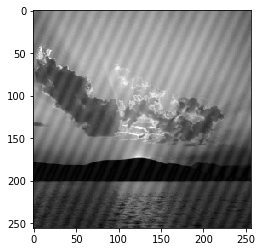

Valor médio de cinza: 109.53244018554688


In [30]:
img2 = cv2.imread('sunset3.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap = 'gray')
plt.show()

total = 0
for i in range (img2.shape[0]):
    for j in range (img2.shape[1]):
        total +=img[i,j]

print('Valor médio de cinza:', total/img2.size)

In [27]:
f = np.fft.fft2(img2)
print('Valor médio de cinza:', f[0,0]/img2.size)

Valor médio de cinza: (109.53244018554688+0j)


Resposta: Quando aplicamos a transformada de Fourier em uma imagem, dividimos ela em todas as suas frequências. O F(0,0) representa o nível médio de escala cinza, ou seja, a soma dos valores de cada pixel dividido pelo número de pixels. O F(0,0) não é um número complexo pois não tem seu conjugado. 

# Exercício 3

Aplicando a Transformada de Fourier para obter as frequências da imagem 

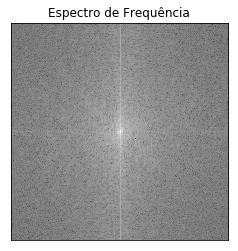

In [18]:
c = 20
img3 = cv2.imread('sunset3.bmp',0)
f = np.fft.fft2(img3)

#Retirando a interferência dos ruídos
f[8][18] = 0.0
f[248][238] = 0.0

fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + c*np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de Frequência'), plt.xticks([]), plt.yticks([])
plt.show()

Aplicando a Transformada Inversa para obter a imagem sem ruído

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


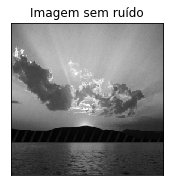

In [17]:
fi = np.float32(np.fft.ifft2(f))

plt.subplot(122),plt.imshow(fi, cmap = 'gray')
plt.title('Imagem sem ruído'), plt.xticks([]), plt.yticks([])
plt.show()


# Exercício 4

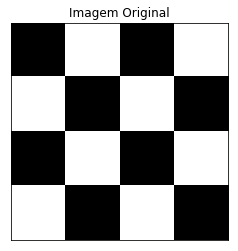

In [75]:
img4 = cv2.imread('quad.bmp',0)
plt.imshow(img4, cmap = 'gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.show()

Aplicando a Transformada de Fourier para obter o espectro de frequência da imagem original

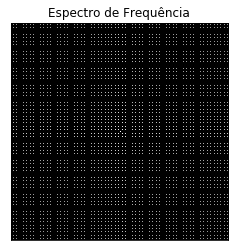

In [80]:
c = 100
f = np.fft.fft2(img4)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + c*np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de Frequência'), plt.xticks([]), plt.yticks([])
plt.show()

Criando uma mascara para filtrar as baixas frequencias

In [89]:
rows, cols = img4.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
num = 10
mask[crow - num:crow + num, ccol - num:ccol + num] = 1

Aplicando a Transformada Inversa de Fourier 

In [90]:
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

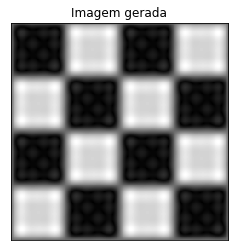

In [92]:
plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem gerada'), plt.xticks([]), plt.yticks([])
plt.show()

Fonte: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html